# Datan käsittely Pythonissa

Python on monikäyttöinen ns. "general-purpose" ohjelmointikieli, jolla voidaan käsitellä melkeinpä mitä vain dataa monilla eri tavoilla. Tällä kurssilla aihetta käsitellään paikkatietonäkökulmasta, keskittyen ensisijaisesti kahdentyyppiseen dataan: taulukkomaisiin aineistoihin sekä vektorimuotoiseen paikkatietoon.

# pandas

## Mitä ja miksi

[Pandas](https://pandas.pydata.org/) on Python-kirjasto, joka on muodostunut jo standardiksi data-analytiikassa ja taulukkomaisten aineistojen käsittelyssä. Paikkatietonäkökulmasta pandas on erityisen merkityksellinen siksi, että vektorimuotoisen paikkatiedon käsittelyssä laajasti käytetty [GeoPandas](https://geopandas.org/en/stable/)-kirjasto perustuu nimestäkin päätellen pandasiin, täydentäen sitä tuella spatiaalisiin operaatioihin ja geometrisiin datatyyppeihin.

Tässä osiossa käsitellään siis pandasin perusteita, ja samalla vaivalla valmistaudutaan käyttämään GeoPandasia seuraavassa osassa.

## Kirjaston käyttöönotto

Koska pandas on Pythonin standardikirjaston ulkopuolinen kirjasto, täytyy se ottaa erikseen käyttöön. Koska olet kurssin python-ympäristössä, varsinainen asennus condalla on jo hoidettu (`conda install -c conda-forge pandas`). Näin ollen voit ottaa kirjaston suoraan käyttöön `import` avainsanalla. Huomaa, että on tavanomaista antaa pandas-kirjastolle nimeksi `pd`, kun se otetaan käyttöön.

In [1]:
import pandas as pd

# Datan lukeminen

Pandas lukee ja kirjoittaa [useita tiedosto- ja tietokantaformaatteja](https://pandas.pydata.org/docs/user_guide/io.html). Jos datasi on jollain tapaa taulukoksi taipuvaa, on pandasilla oletettavasti sille tuki.

## Tiedostopolut

Jotta voimme tuoda dataa tiedostosta, täytyy ensin tietää tiedoston sijainti, eli polku (path). Kurssin datakansio sijaitsee `kurssimateriaali`-hakemiston alla. Suhteessa tähän notebookkiin tiedoston sijaintia voidaan kuvailla näin: yksi askel tiedostohierarkiassa ylöspäin, sitten hakemisto `data`, jonka sisällä tiedosto `lightnings.csv`.

Kirjoitetaan nyt yllä sanoin kuvattu polku suhteelliseksi tiedostopoluksi, eli:

```
../data/lightnings.csv
```

Polun osat ovat:
- `../` = yhtä ylemmän tason hakemisto suhteessa tähän notebookkiin, tässä tapauksessa `kurssimateriaali`
- `data/` = datakansio
- `lightnings.csv` = tiedosto

Pythonissa tiedostopolkujen käsittelyyn kannattaa käyttää pythonin oman `pathlib`-kirjaston `Path`-oliota. Näin mm. varmistamme, että polku toimii kaikilla käyttöjärjestelmillä.

In [2]:
from pathlib import Path

file_path = Path("../data/lightnings.csv")

Luetaan nyt `csv`-muotoista dataa tiedostosta `read_csv()`-metodilla. 

Koska kysessä on pandasin metodi, täytyy sitä kutsua luomamme `pd`-muuttujan kautta:

In [3]:
lightnings = pd.read_csv(file_path)

# DataFrame

Äsken luodussa muuttujassa `lightnings` on nyt **DataFrame**, joka sisältää csv-tiedoston sisällön. Tässä tapauksessa kyseessä on otos Ilmatieteen laitoksen avointa dataa, tarkemmin sanottuna salamahavaintoja.

DataFrame on  kaksiulotteinen tietorakenne, jossa on rivejä (row) ja sarakkeita (column). Se on pandasin keskeisin tietorakenne, ja tiedon "säilömisen" lisäksi se toteuttaa useita erilaisia metodeita tiedon käsittelyyn.

Tutkitaan DataFramea tarkemmin:

In [4]:
type(lightnings)

pandas.core.frame.DataFrame

In [5]:
lightnings

,time,abs_peak_current_ka,latitude,longitude
0,1717200010,4.0,68.9186,22.1900
1,1717200010,5.0,68.8757,22.2367
2,1717200010,2.0,68.7596,22.2646
3,1717200011,1.0,68.7883,21.7543
4,1717200044,7.0,68.7939,21.3669
...,...,...,...,...
83461,1717286397,3.0,61.0853,22.0858
83462,1717286397,5.0,61.0973,22.0059
83463,1717286398,6.0,61.3490,23.5206
83464,1717286398,21.0,61.3403,23.5703


Jo ylle tulostuneesta DataFramen visuaalisesta estiyksestä voidaan nähdä paljon. Vaikuttaa siltä, että yksi rivi kuvaa yhtä salamahavaintoa. Jokaisesta havainnosta tiedetään aika, sähkövirran absoluuttinen voimakkuus kiloampeereina, sekä sijaintitieto (lat / lon)

Näämme myös rivien määrän, ja voimme jo päätellä sarakkeiden sisällön tyyppejä.

DataFramen `shape`-attribuutti kuvaa DataFramen muotoa, eli rivien ja sarakkeiden määrää:

In [6]:
lightnings.shape

(83466, 4)

Sarakkeiden nimiin päästään käsiksi `columns`-attribuutilla:

In [7]:
lightnings.columns

Index(['time', 'abs_peak_current_ka', 'latitude', 'longitude'], dtype='object')

Listoillekkin toimiva `len`-funktio toimii myös DataFrameilla:

In [8]:
len(lightnings)

83466

Voit tutkia DataFramen alku- ja loppupäitä erikseen:

In [9]:
lightnings.head()

,time,abs_peak_current_ka,latitude,longitude
0,1717200010,4.0,68.9186,22.1900
1,1717200010,5.0,68.8757,22.2367
2,1717200010,2.0,68.7596,22.2646
3,1717200011,1.0,68.7883,21.7543
4,1717200044,7.0,68.7939,21.3669


In [10]:
lightnings.tail(3)

,time,abs_peak_current_ka,latitude,longitude
83463,1717286398,6.0,61.3490,23.5206
83464,1717286398,21.0,61.3403,23.5703
83465,1717286398,4.0,61.3476,23.4422


Tilastollisia tunnuslukuja saadaan `describe`-metodilla:

In [11]:
lightnings.describe()

,time,abs_peak_current_ka,latitude,longitude
count,8.346600e+04,83466.000000,83466.000000,83466.000000
mean,1.717241e+09,7.005775,63.114014,25.430464
std,1.301645e+04,7.495004,2.444437,2.327215
min,1.717200e+09,1.000000,59.825900,19.603300
25%,1.717233e+09,3.000000,61.106825,23.480750
50%,1.717240e+09,5.000000,62.624150,25.213400
75%,1.717247e+09,8.000000,63.902000,27.405250
max,1.717286e+09,214.000000,69.256900,31.467600


# Datan valitseminen

## Sarakkeet

Yksi tyypillisimmistä tehtävistä taulukkomaisen datan käsittelyssä on eri sarakkeiden tai rivien valitseminen. Aloitetaan sarakkeista.

DataFramen sarakkeita voit valita laittamalla sarakkeen nimen hakasulkuihin DataFramen perään:

In [12]:
column = lightnings["abs_peak_current_ka"]
column

0         4.0
1         5.0
2         2.0
3         1.0
4         7.0
         ... 
83461     3.0
83462     5.0
83463     6.0
83464    21.0
83465     4.0
Name: abs_peak_current_ka, Length: 83466, dtype: float64

Tuloste näyttää nyt eriltä kuin ennen. Tutkitaan asiaa `type`-funktiolla:

In [13]:
type(column)

pandas.core.series.Series

Pandasissa yksittäiset rivit ja sarakkeet ovat tyypiltään **Series**.

Pandasin käytössä teknisiä yksityiskohtia ei tarvitse ymmärtää syvällisesti - esimerkiksi Seriesistä riittää tietää, että se on ikäänkuin pandasin oma optimoitu versio listasta. Series esimerkiksi sisältää indeksin sekä tekee datatyyppien perusteella automaattisesti suorituskykyoptimointeja.

Series toteuttaa myös erilaisia toiminnallisuuksia. Esimerkkejä yhden sarakkeen sisällön tutkimisesta:

In [14]:
column.max()

214.0

In [15]:
column.unique()

array([  4.,   5.,   2.,   1.,   7.,  13.,   9.,   8.,   3.,  22.,   6.,
        23.,  37.,  16.,  32.,  10.,  11.,  15., 126.,  68.,  12.,  17.,
        82.,  58.,  14.,  98.,  64.,  70.,  77.,  34.,  49.,  19.,  72.,
        18.,  20.,  81.,  31.,  26.,  46., 120.,  38.,  44.,  50.,  65.,
        87.,  61.,  47.,  45.,  56.,  36.,  42.,  27.,  54., 101.,  85.,
        60.,  35.,  24.,  41.,  67.,  89.,  69.,  25.,  80.,  29.,  78.,
        21., 134., 151.,  62.,  90., 140., 133.,  28.,  63.,  51.,  48.,
       103., 147.,  30.,  92.,  43.,  74.,  40.,  39.,  33.,  53.,  57.,
        76.,  75.,  52.,  73.,  55.,  94.,  96.,  88.,  71.,  66., 102.,
        97., 113., 128.,  91.,  93.,  79., 153.,  59., 107.,  95., 100.,
       214., 115., 144., 117.,  84., 127., 123.,  83., 149., 173., 118.,
       119., 108., 137., 156., 114., 166., 207.,  86.])

In [16]:
column.describe()

count    83466.000000
mean         7.005775
std          7.495004
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max        214.000000
Name: abs_peak_current_ka, dtype: float64

Series ei kuitenkaan toteuta yhtä laajoja toiminnallisuuksia kuin DataFrame. Usein halutaankin nimenomaan valita yksittäisten Seriesien sijaan otos DataFramesta uutena DataFramena. Se tapahtuu samaan tapaan - ainoa muutos on, että halutut sarakkeet annetaan listana:

In [17]:
lightnings[["abs_peak_current_ka"]]

,abs_peak_current_ka
0,4.0
1,5.0
2,2.0
3,1.0
4,7.0
...,...
83461,3.0
83462,5.0
83463,6.0
83464,21.0


In [18]:
lightnings[["abs_peak_current_ka", "latitude", "time"]].head()

,abs_peak_current_ka,latitude,time
0,4.0,68.9186,1717200010
1,5.0,68.8757,1717200010
2,2.0,68.7596,1717200010
3,1.0,68.7883,1717200011
4,7.0,68.7939,1717200044


In [19]:
type(lightnings[["abs_peak_current_ka"]])

pandas.core.frame.DataFrame

## Harjoitus - Sarakkeiden valinta

Tässä osassa emme tarvitse vielä sijaintitietoja. Tee siis `lightnings` Dataframesta versio, jossa ei ole `latitude` ja `longitude`-sarakkeita.

1. Miten saat selville DataFramen sarakkeet?
2. Muodosta lista sarakkeista, jotka haluat valita
3. Valitse haluamasi sarakkeet käyttämällä listaa
4. Kun tulos näyttää hyvältä, voit ylikirjoittaa `lightnings`-muuttujan uudella DataFramellasi

In [20]:
# Kirjoita Ratkaisu


## Ratkaisu

In [21]:
lightnings = lightnings.copy()[["time", "abs_peak_current_ka"]]
lightnings.head()

,time,abs_peak_current_ka
0,1717200010,4.0
1,1717200010,5.0
2,1717200010,2.0
3,1717200011,1.0
4,1717200044,7.0


## Rivien valinta indeksin perusteella

Sarakkeiden lisäksi voidaan valita rivejä. Ehkä yksinkertaisin tapa on tehdä valinta rivin sijainnin, eli indeksin mukaan. Tämä tapahtuu `iloc`-attribuutin kautta. Kun haluamme rivejä, voidaan `iloc`-attribuutille antaa hakasuluissa numerona se indeksi, joka halutaan valita - aivan kuin listalle:

In [22]:
row = lightnings.iloc[0]
row

time                   1.717200e+09
abs_peak_current_ka    4.000000e+00
Name: 0, dtype: float64

In [23]:
type(row)

pandas.core.series.Series

Saamme jälleen Seriesin. Sarakkeista tuttu listan käyttö toimii, jos haluamme DataFramen:

In [24]:
lightnings.iloc[[0]]

,time,abs_peak_current_ka
0,1717200010,4.0


In [25]:
type(lightnings.iloc[[0, 1, 2]])

pandas.core.frame.DataFrame

huomaa, että jokaisen halutun rivin indeksiä ei tarvitse määritellä erikseen. Voimme käyttää listoillakin toimivaa valintaa `[alku:loppu]`, jossa alku on ensimmäinen ja loppu viimeinen indeksi, johon asti halutaan hakea.

In [26]:
lightnings.iloc[0:5]

,time,abs_peak_current_ka
0,1717200010,4.0
1,1717200010,5.0
2,1717200010,2.0
3,1717200011,1.0
4,1717200044,7.0


## Rivien valinta ehdon perusteella

Usein emme tiedä tarkalleen minkä indeksin riviltä löytyy mitäkin, emmekä näin ollen voi käyttää indeksejä valintoihin. Valintoja on myös usein tehtävä dynaamisesti joihinkin ehtoihin perustuen, jolloin indeksipohjainen valinta ei edes riitäisi.

Monimutkaisempia, esimerkiksi ehtoon perustuvia, valintoja voi tehdä DataFramen `loc`-attribuutilla.

Valitaan seuraavaksi kaikki salamahavainnot, joissa sähkövirta on ollut yli 10 kiloampeeria. `loc`-attribuutille annetaan siis ehtona se, että sarakkeen `abs_peak_current_ka` arvo tulisi olla yli 10: 

In [27]:
lightnings.loc[lightnings["abs_peak_current_ka"] > 10]

,time,abs_peak_current_ka
6,1717200044,13.0
15,1717200044,22.0
25,1717200144,22.0
26,1717200144,23.0
30,1717200198,37.0
...,...,...
83439,1717286351,15.0
83445,1717286376,17.0
83458,1717286397,13.0
83459,1717286397,14.0


Ehto palauttaa siis `True` tai `False` joka riville, minkä perusteella valinta tehdään. Myös selkeyden vuoksi ehto kannattaa usein kirjoittaa erikseen:

In [28]:
current_over_10 = lightnings["abs_peak_current_ka"] > 10
current_over_10

0        False
1        False
2        False
3        False
4        False
         ...  
83461    False
83462    False
83463    False
83464     True
83465    False
Name: abs_peak_current_ka, Length: 83466, dtype: bool

Jolloin itse valinnasta tulee huomattavasti luettavampi:

In [29]:
lightnings.loc[current_over_10]

,time,abs_peak_current_ka
6,1717200044,13.0
15,1717200044,22.0
25,1717200144,22.0
26,1717200144,23.0
30,1717200198,37.0
...,...,...
83439,1717286351,15.0
83445,1717286376,17.0
83458,1717286397,13.0
83459,1717286397,14.0


## Harjoitus - rivien valinta yhdellä ehdolla

Valitse ne rivit, joiden sähkövirta on pienempi tai yhtä suuri kuin 5 kiloampeeria.

1. Kirjoita ehto, ja talleta se johonkin muuttujaan
2. Tee valinta käyttämällä ehtoa `loc`-attribuutin kanssa

In [30]:
# Kirjoita ratkaisu


## Ratkaisu

In [31]:
condition = lightnings["abs_peak_current_ka"] <= 5

lightnings.loc[condition]

,time,abs_peak_current_ka
0,1717200010,4.0
1,1717200010,5.0
2,1717200010,2.0
3,1717200011,1.0
8,1717200044,4.0
...,...,...
83457,1717286395,4.0
83460,1717286397,3.0
83461,1717286397,3.0
83462,1717286397,5.0


## Rivien valinta useilla ehdoilla

Ehtoja voi myös yhdistellä. Huomaa, että `loc`-käyttötapauksessa `and` ja `or` korvautuvat operaattoreilla `&` ja `|`. 

Valitaan havainnot, joissa virta on tasan 10 tai 20 kiloampeeria:

In [32]:
column = lightnings["abs_peak_current_ka"]

current_10_or_20 = (column == 10) | (column == 20)

lightnings.loc[current_10_or_20]

,time,abs_peak_current_ka
48,1717200199,10.0
53,1717200199,10.0
65,1717200319,10.0
94,1717200523,10.0
103,1717200585,10.0
...,...,...
83271,1717285940,10.0
83296,1717286037,10.0
83353,1717286175,10.0
83388,1717286258,10.0


# Aikaleimat

Aineistossamme on mukana `time`-sarake. Sisältö ei kuitenkaan (ainakaan ihmiselle) näytä kovin selkeältä aikamääreeltä.

Kyseessä on [Unix-timestamp](https://www.unixtimestamp.com/), joka on usein koneluettavissa aineistoissa käytetty aikaformaatti. Pandasissa onkin valmiina tapa muuttaa tämä (ja moni muukin) aikaformaatti pythonissa hyödyllisempään `datetime`-muotoon: `to_datetime`-funktio.

Korvataan siis sarakkeen `time` sisältö luettavammilla aikamääreillä `to_datetime`-funktiolla. Huomaa, että määrittelemme alkuperäisen yksikön olevan sekunteja, eli `s`.

In [33]:
lightnings["time"] = pd.to_datetime(lightnings["time"], unit="s")
lightnings.head()

,time,abs_peak_current_ka
0,2024-06-01 00:00:10,4.0
1,2024-06-01 00:00:10,5.0
2,2024-06-01 00:00:10,2.0
3,2024-06-01 00:00:11,1.0
4,2024-06-01 00:00:44,7.0


Datetime-olioita voidaan käsitellä monien tuttujen metodien avulla. Haetaan vaikkapa ensimmäinen ja viimeinen havainto:

In [34]:
lightnings["time"].min()

Timestamp('2024-06-01 00:00:10')

In [35]:
lightnings["time"].max()

Timestamp('2024-06-01 23:59:58')

Huomaamme, että salamahavaintoja on yhden vuorokauden ajalta.

Pääsemme käsiksi datetime-olioiden attribuutteihin (esim. päivä, tunti, tai sekunti) sarakkeen `dt`-attribuutin kautta:

In [36]:
lightnings["time"].dt.hour

0         0
1         0
2         0
3         0
4         0
         ..
83461    23
83462    23
83463    23
83464    23
83465    23
Name: time, Length: 83466, dtype: int32

Voimme valita rivejä nyt myös ajan perusteella:

In [37]:
before_5_am = lightnings["time"].dt.hour < 5

lightnings.loc[before_5_am]

,time,abs_peak_current_ka
0,2024-06-01 00:00:10,4.0
1,2024-06-01 00:00:10,5.0
2,2024-06-01 00:00:10,2.0
3,2024-06-01 00:00:11,1.0
4,2024-06-01 00:00:44,7.0
...,...,...
1524,2024-06-01 04:55:14,4.0
1525,2024-06-01 04:55:14,3.0
1526,2024-06-01 04:55:14,3.0
1527,2024-06-01 04:58:24,3.0


## Harjoitus - valinta ajan ja sähkövirran perusteella

Kuinka monta yli 100:n kiloampeerin salamaa iski klo 20:00 jälkeen?
1. kirjoita molemmat ehdot, selkeyden vuoksi kannattaa käyttää muuttujia.
3. tee valinta ehtojen ja `loc`-attribuutin avulla

In [38]:
# Kirjoita ratkaisu


## Ratkaisu

In [39]:
after_2000 = lightnings["time"].dt.hour > 20
current_over_100 = lightnings["abs_peak_current_ka"] > 100

len(lightnings.loc[(after_2000) & (current_over_100)])

10

# Datan ryhmittely ja yksinkertainen visualisointi

Mitä jos haluaisimme nähdä kuinka monta salamaa on iskenyt vuorokauden eri tunteina?

Yksi ratkaisu voisi olla ryhmitellä data tunnin mukaan, ja sen jälkeen visualisoida tuntikohtaiset rivien määrät.

Lisätään ensin DataFrameen sarake `hour`, joka saa sisällöksi vain tunnin.

In [40]:
lightnings["hour"] = lightnings["time"].dt.hour 
lightnings

,time,abs_peak_current_ka,hour
0,2024-06-01 00:00:10,4.0,0
1,2024-06-01 00:00:10,5.0,0
2,2024-06-01 00:00:10,2.0,0
3,2024-06-01 00:00:11,1.0,0
4,2024-06-01 00:00:44,7.0,0
...,...,...,...
83461,2024-06-01 23:59:57,3.0,23
83462,2024-06-01 23:59:57,5.0,23
83463,2024-06-01 23:59:58,6.0,23
83464,2024-06-01 23:59:58,21.0,23


Ryhmitellään data uuden sarakkeen arvoihin perustuen käyttäen `group_by`-funktiota.

In [41]:
group_by = lightnings.groupby("hour")
group_by

GroupBy-oliolle täytyy vielä kertoa, miten ryhmittely tulisi tehdä. Kun haluamme vain rivien määrän, voidaa käyttää `size`-funktiota.

In [42]:
lightnings_per_hour = group_by.size()
lightnings_per_hour

hour
0       996
1       208
2        10
3        65
4       250
5       207
6      1780
7      6097
8     10375
9     11595
10    10323
11    12666
12     8028
13     6915
14     5724
15     2399
16      447
17      391
18     1004
19      810
20      428
21      541
22      864
23     1343
dtype: int64

Nyt voimme visualisoida datan `plot`-metodilla:

<Axes: xlabel='hour'>

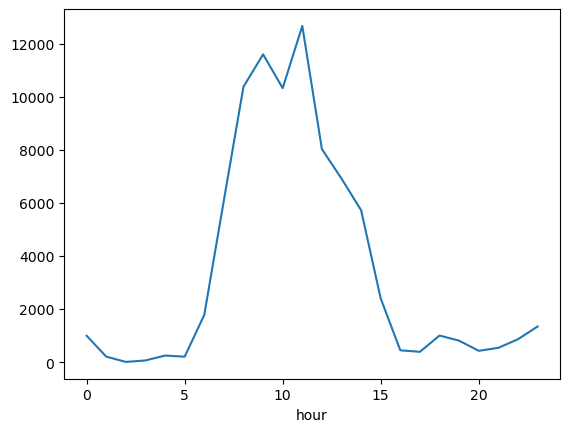

In [43]:
lightnings_per_hour.plot()

Laitetaan kuvaajalle vielä selitteet ja vaihdetaan sen tyyli pylväiksi:

<Axes: title={'center': 'Hourly lightning strikes on 1.6.2024'}, xlabel='hour', ylabel='count'>

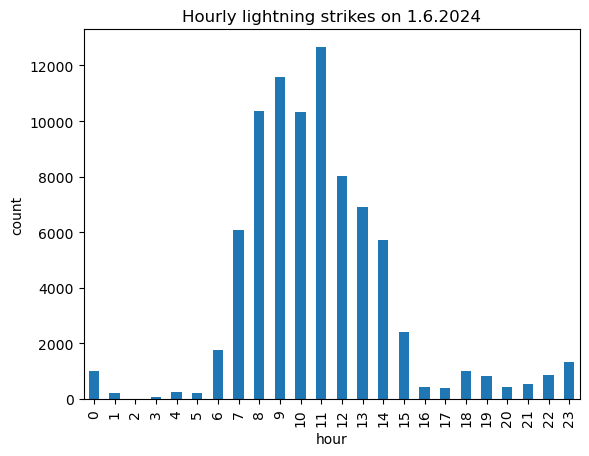

In [44]:
lightnings_per_hour.plot(
    title="Hourly lightning strikes on 1.6.2024",
    ylabel="count",
    kind="bar",
)